# Regression
- Findind depending variable values using independent varialbes

### Step1 -Data Preprocessing

# Simple Linear Regression( involves Only 1 input variable)

In [24]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [47]:
#Read the datset
dataset = pd.read_csv("weight-height.csv")
#dataset.drop('Gender',axis=1,inplace=True)

In [48]:
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [49]:
#check if null values is present in dataset
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [51]:
dataset.Gender = dataset.Gender.apply(lambda x:0 if x =='Female' else 1)

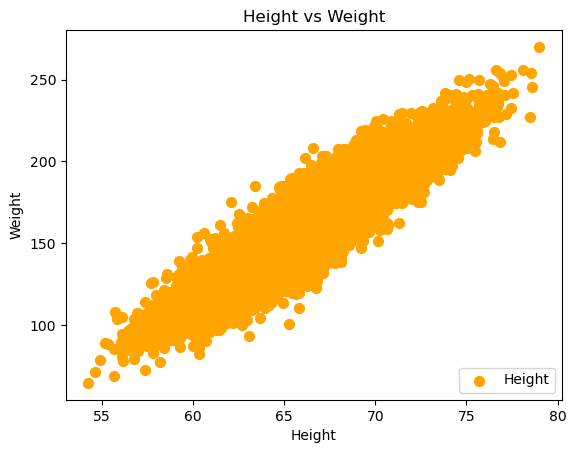

In [28]:
#Plot Height vs Weight
x2 = dataset.iloc[:, 0].values
y2 = dataset.iloc[:, 1].values
plt.scatter(x2,y2,label='Height',color='Orange',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc='lower right')
plt.show()


In [29]:
#Separating the dependent and independent values
#X-Independent variable
X = dataset.drop('Weight',axis=1)

In [30]:
print(X)

         Height
0     73.847017
1     68.781904
2     74.110105
3     71.730978
4     69.881796
...         ...
9995  66.172652
9996  67.067155
9997  63.867992
9998  69.034243
9999  61.944246

[10000 rows x 1 columns]


In [31]:
#y-dependent or target variable
y = dataset['Weight'].values
print(y)

[241.8935632 162.3104725 212.7408556 ... 128.4753188 163.8524613
 113.6491027]


### step2: Splitting the dataset into traning  and testing set

In [32]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1321)

In [34]:
import random
random.seed(123445)
random.randint(1,10)

8

### Step 3-build a linear model

# Training the model

In [35]:
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
regressor.coef_, regressor.intercept_


(array([7.73190342]), -351.79070507483266)

# Prediction on Training Data: Training Accuracy

In [37]:
#Predicting the training set
y_train_pred = regressor.predict(X_train)

In [38]:
pd.DataFrame({'Original Weight':y_train, 'Predicted_Weight':y_train_pred})

,Original Weight,Predicted_Weight
0,172.794261,171.947181
1,147.029164,136.865319
2,226.701023,223.526217
3,161.431658,153.409738
4,149.599596,152.788998
...,...,...
7995,178.918714,193.225172
7996,131.395557,145.067915
7997,122.924680,125.777442
7998,141.375098,132.066580


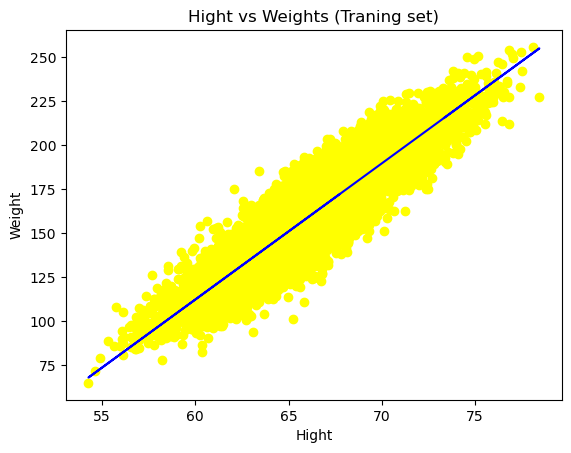

In [39]:
#Visualising the training set results
plt.scatter(X_train, y_train, color='Yellow')
plt.plot(X_train,y_train_pred, color='blue')
plt.title('Hight vs Weights (Traning set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

In [40]:
print('Coefficient:',regressor.coef_)
print('Intercept:', regressor.intercept_)

Coefficient: [7.73190342]
Intercept: -351.79070507483266


In [41]:
print('Variance score: %.2f' % regressor.score(X_train,y_train))

Variance score: 0.85


# Prediction  on Testing Data: Testing  Accuracy

In [42]:
y_test_pred = regressor.predict(X_test)

In [43]:
pd.DataFrame({'Original Weight': y_test, "Predicted Weight": y_test_pred})

,Original Weight,Predicted Weight
0,183.936860,184.603609
1,129.001462,137.582434
2,170.191325,169.409373
3,193.217673,168.284992
4,166.390656,169.774674
...,...,...
1995,180.793711,151.553391
1996,192.092449,182.016215
1997,128.091026,136.653387
1998,214.060148,198.983018


In [44]:
#Mean square error
print("Mean squared error: %2f" % np.mean((regressor.predict(X_test) - y_test)**2))
# Explained variance score: 1 is prefect prediction
print("Variance score: %2f" % regressor.score(X_test, y_test))

Mean squared error: 147.941798
Variance score: 0.858225


In [45]:
def predictedWeight(height):
    return regressor.predict([[height]])

In [46]:
height = float(input("if you wana guess your wait please provide me your height  in feet"))*12
print(f"Our model says your weight is about {(predictedWeight(height)*0.453592)} kgs")

if you wana guess your wait please provide me your height  in feet5.9
Our model says your weight is about [88.7353218] kgs


C:\Users\Wajiz.pk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
X= dataset.drop("Weight",axis=1)

In [54]:
X

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
9995,0,66.172652
9996,0,67.067155
9997,0,63.867992
9998,0,69.034243


In [59]:
y = dataset['Weight'].values

In [60]:
y

array([241.8935632, 162.3104725, 212.7408556, ..., 128.4753188,
       163.8524613, 113.6491027])

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [63]:
regressor.fit(X_train,y_train)

LinearRegression()

In [64]:
regressor.score(X_train,y_train)

0.9021035919619687

In [66]:
 regressor.score(X_train,y_train)

0.9021035919619687